In [ ]:
#! pip install python-chess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


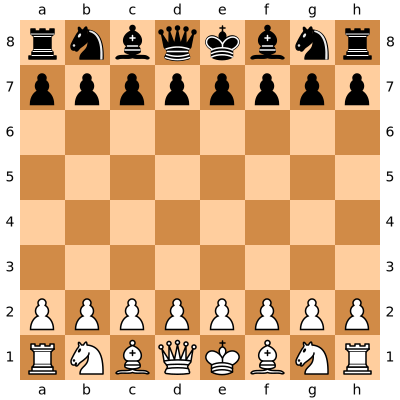

In [ ]:
import chess
board = chess.Board()
board

In [ ]:
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 0, 0, 20, 20, 0, 0, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    0, 0, 0, 0, 0, 0, 0, 0]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]
bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 5, 0, 0, 0, 0, 5, -10,
    -10, 10, 10, 10, 10, 10, 10, -10,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]
rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    0, 0, 0, 0, 0, 0, 0, 0]
queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]
kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

In [ ]:
def evaluate_board():
    if board.is_checkmate():
            if board.turn:
                return -9999
            else:
                return 9999
    if board.is_stalemate():
            return 0
    if board.is_insufficient_material():
            return 0
    wp = len(board.pieces(chess.PAWN, chess.WHITE))
    bp = len(board.pieces(chess.PAWN, chess.BLACK))
    wn = len(board.pieces(chess.KNIGHT, chess.WHITE))
    bn = len(board.pieces(chess.KNIGHT, chess.BLACK))
    wb = len(board.pieces(chess.BISHOP, chess.WHITE))
    bb = len(board.pieces(chess.BISHOP, chess.BLACK))
    wr = len(board.pieces(chess.ROOK, chess.WHITE))
    br = len(board.pieces(chess.ROOK, chess.BLACK))
    wq = len(board.pieces(chess.QUEEN, chess.WHITE))
    bq = len(board.pieces(chess.QUEEN, chess.BLACK))
    
    material = 100 * (wp - bp) + 320 * (wn - bn) + 330 * (wb - bb) + 500 * (wr - br) + 900 * (wq - bq)
    
    pawnsq = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    pawnsq = pawnsq + sum([-pawntable[chess.square_mirror(i)]
                           for i in board.pieces(chess.PAWN, chess.BLACK)])
    
    knightsq = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    knightsq = knightsq + sum([-knightstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    
    bishopsq = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bishopsq = bishopsq + sum([-bishopstable[chess.square_mirror(i)]
                               for i in board.pieces(chess.BISHOP, chess.BLACK)])
    
    rooksq = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)])
    rooksq = rooksq + sum([-rookstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.ROOK, chess.BLACK)])
    
    queensq = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)])
    queensq = queensq + sum([-queenstable[chess.square_mirror(i)]
                             for i in board.pieces(chess.QUEEN, chess.BLACK)])
    
    kingsq = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)])
    kingsq = kingsq + sum([-kingstable[chess.square_mirror(i)]
                           for i in board.pieces(chess.KING, chess.BLACK)])
    
    eval = material + pawnsq + knightsq + bishopsq + rooksq + queensq + kingsq
    if board.turn:
        return eval
    else:
        return -eval

In [ ]:
evaluate_board()

0

In [ ]:
import chess.polyglot
def selectmove(depth):
    try:
        move = chess.polyglot.MemoryMappedReader("/content/drive/human.bin").weighted_choice(board).move
        return move
    except:
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            board.push(move)
            boardValue = -alphabeta(-beta, -alpha, depth - 1)
            if boardValue > bestValue:
                bestValue = boardValue
                bestMove = move
            if (boardValue > alpha):
                alpha = boardValue
            board.pop()
        return bestMove
    

In [ ]:
def alphabeta(alpha, beta, depthleft):
    bestscore = -9999
    if (depthleft == 0):
        return quiesce(alpha, beta)
    for move in board.legal_moves:
        board.push(move)
        score = -alphabeta(-beta, -alpha, depthleft - 1)
        board.pop()
        if (score >= beta):
            return score
        if (score > bestscore):
            bestscore = score
        if (score > alpha):
            alpha = score
    return bestscore

In [ ]:
def quiesce(alpha, beta):
    stand_pat = evaluate_board()
    if (stand_pat >= beta):
        return beta
    if (alpha < stand_pat):
        alpha = stand_pat
    for move in board.legal_moves:
        if board.is_capture(move):
            board.push(move)
            score = -quiesce(-beta, -alpha)
            board.pop()
            if (score >= beta):
                    return beta
            if (score > alpha):
                    alpha = score
    return alpha

In [ ]:
import chess.svg
import chess.pgn
import chess.engine
from IPython.display import SVG
from datetime import datetime


1]

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R

r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R

2]

r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . . . . . .
. . N . . N . .
P P P P P P P P
R . B Q K B . R

r . b q k b . r
p p p p p p p p
. . n . . n . .
. . . . . . . .
. . . . . . . .
. . N . . N . .
P P P P P P P P
R . B Q K B . R

3]

r . b q k b . r
p p p p p p p p
. . n . . n . .
. . . . . . . .
. . . . . . . .
. . N . P N . .
P P P P . P P P
R . B Q K B . R

r . b q k b . r
p p p p . p p p
. . n . p n . .
. . . . . . . .
. . . . . . . .
. . N . P N . .
P P P P . P P P
R . B Q K B . R

4]

r . b q k b . r
p p p p . p p p
. . n . p n . .
. . . . . . . .
. . . P . . . .
. . N . P N . .
P P P . . P P P
R . B Q K B . R

r . b q k b . r
p p p . . p p p
. . n . p n . .
. . . p . . . .
. . . P . . . .


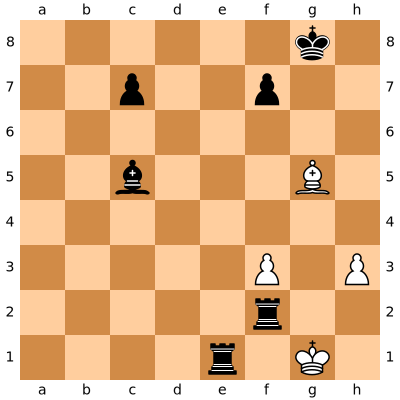

In [ ]:
count = 0
movehistory = []
game = chess.pgn.Game()
board = chess.Board()
while not board.is_game_over(claim_draw=True):
    if board.turn:
        count += 1
        print(f'\n{count}]\n')
        move = selectmove(3)
        board.push(move)
        print(board)
        #SVG(chess.svg.board(board=board, size=400))
        print()
    else:
        move = selectmove(3)
        board.push(move)
        #SVG(chess.svg.board(board=board, size=400))
        print(board)
game.add_line(movehistory)
game.headers["Event"] = "Self Tournament 2020"
game.headers["Site"] = "Grave"
#game.headers["Date"] = str(datetime.datetime.now().date())
game.headers["Round"] = 1
game.headers["White"] = "Ai"
game.headers["Black"] = "Ai"
game.headers["Result"] = str(board.result(claim_draw=True))
print(game)
SVG(chess.svg.board(board=board,size=400))

In [ ]:
print(board)

. . . . . . k .
. . p . . p . .
. . . . . . . .
. . b . . . B .
. . . . . . . .
. . . . . P . P
. . . . . r . .
. . . . r . K .


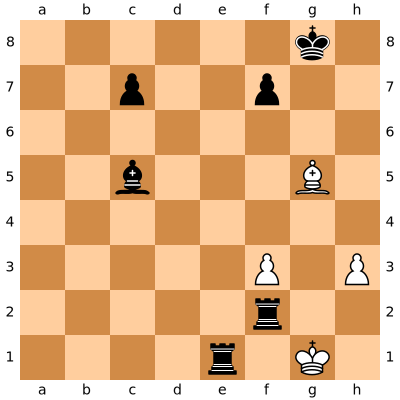

In [ ]:
SVG(chess.svg.board(board=board, size=400))